### WINDSPEED ANALYSIS:

The weather data was downloaded from the [Met Eireann](https://www.met.ie/climate/available-data/historical-data) historical data website.  5 locations across Ireland were chosen to represent North, South, East and West to get an overview of weather conditions across Ireland.  

Locations:

- Belmullet, Co. Mayo
- Malin Head, Co. Donegal
- Dublin Airport, Co. Dublin
- Shannon Airport, Co. Clare
- Valentia Observatory, Co. Kerry



In [1]:
import pandas as pd
import glob
import os

# CSV file path:
folder_path = r'C:\Users\louis\OneDrive\Desktop\PFDA\PFDA_project\weather'

# List of all CSV files in the folder:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# List to store individual DataFrames:
dfs = []

# Loop through each CSV file, add location column, and read the file:
for file in csv_files:
    
    df = pd.read_csv(file, skiprows=23, low_memory=False)
    
   # add location column:
    location = os.path.basename(file).split('.')[0]  # Extract the location name from the file name
    df['location'] = location  # Add this as a new column in the DataFrame
    
    # Append df to the list:
    dfs.append(df)

# Combine all DataFrames in the list into one DataFrame:
combined_df = pd.concat(dfs, ignore_index=True)

# List of the columns to keep:
columns_to_keep = ['date', 'rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp', 'wddir', 'sun', 'vis', 'clamt', 'location']

# Filter the combined_df to keep only the desired columns:
combined_df = combined_df[columns_to_keep]

# Save the combined_df to a csv file:
# combined_df.to_csv('weather_data.csv', index=False)

# Check data
combined_df


# Reference:
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe



,date,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clamt,location
0,16-sep-1956 15:00,0.0,14.4,12.1,10.0,76,12.4,1026.7,0,0,0.1,16000,5,belmullet
1,16-sep-1956 16:00,0.0,13.9,11.6,9.4,75,11.9,1026.6,0,0,0.1,24000,4,belmullet
2,16-sep-1956 17:00,0.0,14.2,12.0,10.0,76,12.3,1026.4,0,0,0.4,19000,5,belmullet
3,16-sep-1956 18:00,0.0,13.0,11.6,10.0,85,12.6,1026.5,0,0,0.0,30000,4,belmullet
4,16-sep-1956 19:00,0.0,12.6,11.7,11.1,90,13.1,1026.8,0,0,0.0,28000,7,belmullet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307398,31-dec-2024 20:00,1.6,8.9,8.5,8.0,94,10.7,1007.4,9,250,,,,valentia
3307399,31-dec-2024 21:00,3.0,8.6,8.4,8.1,96,10.8,1006.1,4,170,,,,valentia
3307400,31-dec-2024 22:00,2.8,8.2,8.0,7.6,95,10.5,1005.8,7,290,,,,valentia
3307401,31-dec-2024 23:00,2.6,8.0,7.5,6.9,92,9.9,1005.0,7,320,,,,valentia


In [2]:

# Strip leading/trailing whitespaces.
combined_df.columns = combined_df.columns.str.strip() 
# Remove special characters.
combined_df.columns = combined_df.columns.str.replace(r'\.?\d+$', '', regex=True)  # Removes .1, .2, etc.
# Check df.
print(combined_df.head())


                date rain  temp  wetb dewpt rhum vappr     msl wdsp wddir  \
0  16-sep-1956 15:00  0.0  14.4  12.1  10.0   76  12.4  1026.7    0     0   
1  16-sep-1956 16:00  0.0  13.9  11.6   9.4   75  11.9  1026.6    0     0   
2  16-sep-1956 17:00  0.0  14.2  12.0  10.0   76  12.3  1026.4    0     0   
3  16-sep-1956 18:00  0.0  13.0  11.6  10.0   85  12.6  1026.5    0     0   
4  16-sep-1956 19:00  0.0  12.6  11.7  11.1   90  13.1  1026.8    0     0   

   sun    vis clamt   location  
0  0.1  16000     5  belmullet  
1  0.1  24000     4  belmullet  
2  0.4  19000     5  belmullet  
3  0.0  30000     4  belmullet  
4  0.0  28000     7  belmullet  


In [3]:

combined_df.columns = combined_df.columns.str.replace(r'123$', '', regex=True) 

print(combined_df)

                      date rain  temp  wetb dewpt rhum vappr     msl wdsp  \
0        16-sep-1956 15:00  0.0  14.4  12.1  10.0   76  12.4  1026.7    0   
1        16-sep-1956 16:00  0.0  13.9  11.6   9.4   75  11.9  1026.6    0   
2        16-sep-1956 17:00  0.0  14.2  12.0  10.0   76  12.3  1026.4    0   
3        16-sep-1956 18:00  0.0  13.0  11.6  10.0   85  12.6  1026.5    0   
4        16-sep-1956 19:00  0.0  12.6  11.7  11.1   90  13.1  1026.8    0   
...                    ...  ...   ...   ...   ...  ...   ...     ...  ...   
3307398  31-dec-2024 20:00  1.6   8.9   8.5   8.0   94  10.7  1007.4    9   
3307399  31-dec-2024 21:00  3.0   8.6   8.4   8.1   96  10.8  1006.1    4   
3307400  31-dec-2024 22:00  2.8   8.2   8.0   7.6   95  10.5  1005.8    7   
3307401  31-dec-2024 23:00  2.6   8.0   7.5   6.9   92   9.9  1005.0    7   
3307402  01-jan-2025 00:00  2.0   7.7   7.1   6.4   91   9.6  1004.9    8   

        wddir  sun    vis clamt   location  
0           0  0.1  16000     

In [4]:
# print location names
print(combined_df.location.unique())


['belmullet' 'dublinairport' 'malinhead' 'shannonairport' 'valentia']


In [5]:
# check columns
combined_df.columns

Index(['date', 'rain', 'temp', 'wetb', 'dewpt', 'rhum', 'vappr', 'msl', 'wdsp',
       'wddir', 'sun', 'vis', 'clamt', 'location'],
      dtype='object')

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307403 entries, 0 to 3307402
Data columns (total 14 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   date      object
 1   rain      object
 2   temp      object
 3   wetb      object
 4   dewpt     object
 5   rhum      object
 6   vappr     object
 7   msl       object
 8   wdsp      object
 9   wddir     object
 10  sun       object
 11  vis       object
 12  clamt     object
 13  location  object
dtypes: object(14)
memory usage: 353.3+ MB


In [7]:
# change date to index
combined_df.set_index('date', inplace=True)

combined_df

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clamt,location
date,,,,,,,,,,,,,
16-sep-1956 15:00,0.0,14.4,12.1,10.0,76,12.4,1026.7,0,0,0.1,16000,5,belmullet
16-sep-1956 16:00,0.0,13.9,11.6,9.4,75,11.9,1026.6,0,0,0.1,24000,4,belmullet
16-sep-1956 17:00,0.0,14.2,12.0,10.0,76,12.3,1026.4,0,0,0.4,19000,5,belmullet
16-sep-1956 18:00,0.0,13.0,11.6,10.0,85,12.6,1026.5,0,0,0.0,30000,4,belmullet
16-sep-1956 19:00,0.0,12.6,11.7,11.1,90,13.1,1026.8,0,0,0.0,28000,7,belmullet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31-dec-2024 20:00,1.6,8.9,8.5,8.0,94,10.7,1007.4,9,250,,,,valentia
31-dec-2024 21:00,3.0,8.6,8.4,8.1,96,10.8,1006.1,4,170,,,,valentia
31-dec-2024 22:00,2.8,8.2,8.0,7.6,95,10.5,1005.8,7,290,,,,valentia


In [8]:
# convert date to datetime
combined_df.index = pd.to_datetime(combined_df.index, errors='coerce')

# check the index
print(combined_df.index.dtype)  


C:\Users\louis\AppData\Local\Temp\ipykernel_20260\1178169601.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df.index = pd.to_datetime(combined_df.index, errors='coerce')


datetime64[ns]


In [9]:
# change wdsp, temp, wetb, rain, rhum to numeric
combined_df['wdsp'] = pd.to_numeric(combined_df['wdsp'], errors='coerce')
combined_df['temp'] = pd.to_numeric(combined_df['temp'], errors='coerce')
combined_df['wetb'] = pd.to_numeric(combined_df['wetb'], errors='coerce')
combined_df['rain'] = pd.to_numeric(combined_df['rain'], errors='coerce')
combined_df['rhum'] = pd.to_numeric(combined_df['rhum'], errors='coerce')


# check data types
combined_df.dtypes



rain        float64
temp        float64
wetb        float64
dewpt        object
rhum        float64
vappr        object
msl          object
wdsp        float64
wddir        object
sun          object
vis          object
clamt        object
location     object
dtype: object

In [10]:
# check for missing values
combined_df.isnull().sum()

rain         45
temp         60
wetb        117
dewpt         0
rhum         67
vappr         0
msl           0
wdsp        110
wddir         0
sun           0
vis           0
clamt         0
location      0
dtype: int64

In [11]:
# remove missing values
combined_df.dropna(inplace=True)

# check for missing values
combined_df.isnull().sum()

rain        0
temp        0
wetb        0
dewpt       0
rhum        0
vappr       0
msl         0
wdsp        0
wddir       0
sun         0
vis         0
clamt       0
location    0
dtype: int64

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format) 

# Group the data by 'location'
grouped = combined_df.groupby('location')

# Get summary statistics for each group (location)
location_stats = grouped[['wdsp', 'temp']].describe()

# Display the summary statistics
location_stats

wdsp                                             temp  \
                   count  mean  std  min  25%   50%   75%   max     count   
location                                                                    
belmullet      598641.00 12.71 6.99 0.00 8.00 12.00 17.00 63.00 598641.00   
dublinairport  701280.00 10.13 5.69 0.00 6.00  9.00 14.00 46.00 701280.00   
malinhead      610692.00 15.22 7.83 0.00 9.00 14.00 20.00 63.00 610692.00   
shannonairport 695385.00  9.59 5.62 0.00 6.00  9.00 13.00 60.00 695385.00   
valentia       701172.00 10.11 6.11 0.00 6.00 10.00 14.00 58.00 701172.00   

                                                         
                mean  std    min  25%   50%   75%   max  
location                                                 
belmullet      10.20 4.04  -7.30 7.50 10.30 13.20 28.20  
dublinairport   9.65 4.89 -11.50 6.10  9.70 13.20 29.10  
malinhead       9.76 3.90  -6.00 6.90  9.80 12.70 26.60  
shannonairport 10.39 4.87 -11.30 7.10 10.50 13.80 31.50  
valentia       10.93 3.97  -7.70 8.40 11.00 13.80 29.00

### Data Visualisation:

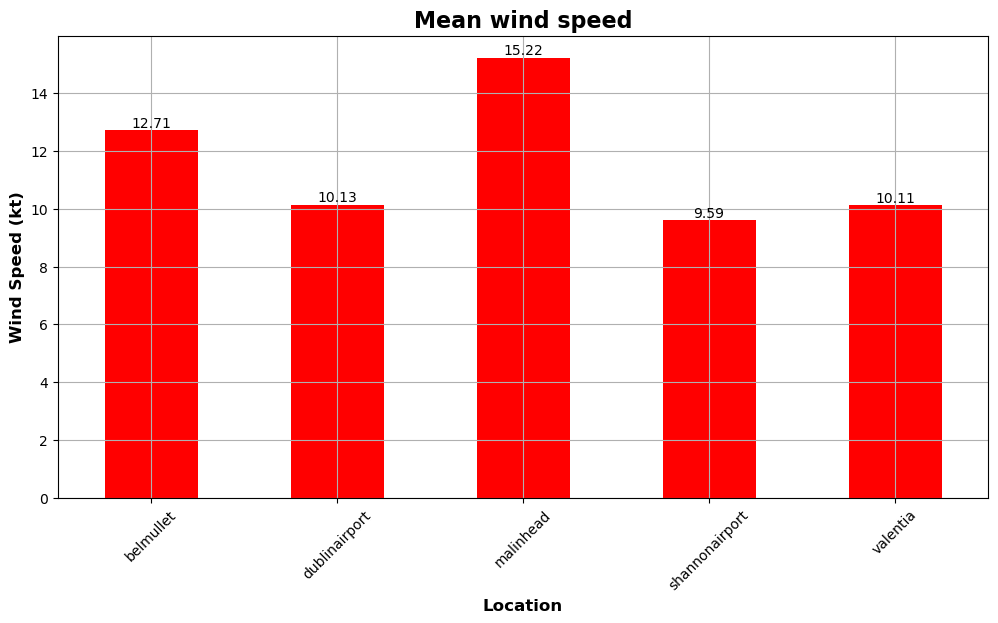

In [13]:
# bar plot of mean wind speed at each location
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
grouped['wdsp'].mean().plot(kind='bar', color='red')
plt.title('Mean wind speed', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12, fontweight='bold')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid()

# Add annotations to the plot
for i, mean_wdsp in enumerate(grouped['wdsp'].mean()):
    plt.text(i, mean_wdsp, round(mean_wdsp, 2), ha='center', va='bottom')

plt.savefig('mean_wind_speed.png')

plt.show()

In [14]:
# wdsp data
wdsp_data = combined_df['wdsp'] # Extract the wdsp column

# resample data to monthly frequency
wdsp_monthly = wdsp_data.resample('ME').mean()

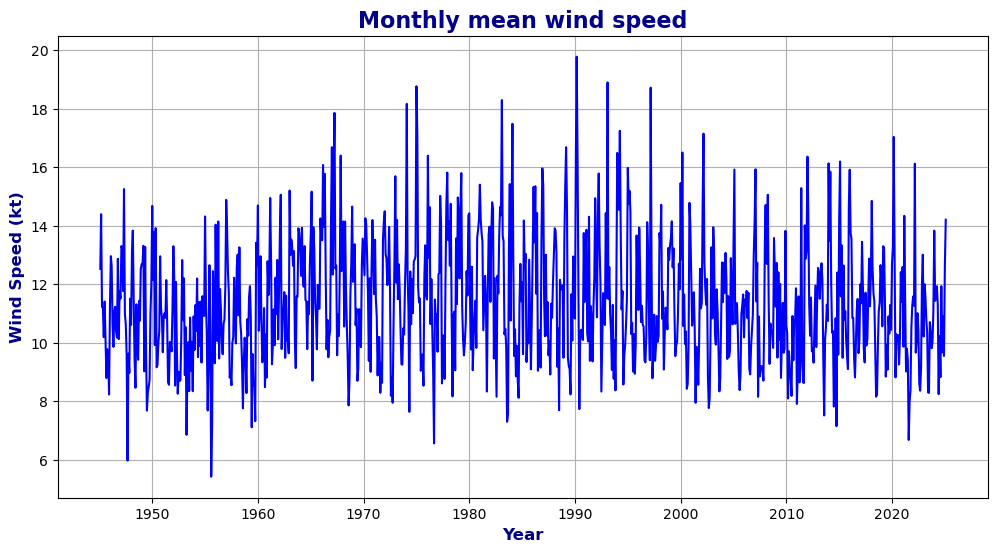

In [15]:
# plot monthly data wdsp 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(wdsp_monthly, color='b')
plt.title('Monthly mean wind speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid()
plt.show()

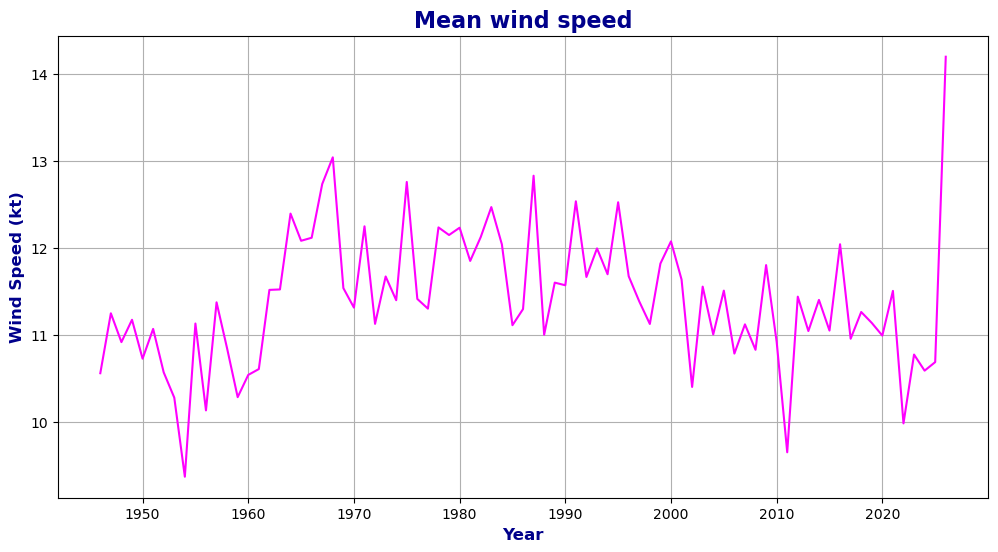

In [16]:
# resample data to yearly frequency
wdsp_yearly = wdsp_data.resample('YE').mean()
wdsp_yearly

# plot yearly data wdsp 
plt.figure(figsize=(12, 6))
plt.plot(wdsp_yearly, color='magenta')
plt.title('Mean wind speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid()
plt.savefig('mean_yearly_windspeed.png')
plt.show()



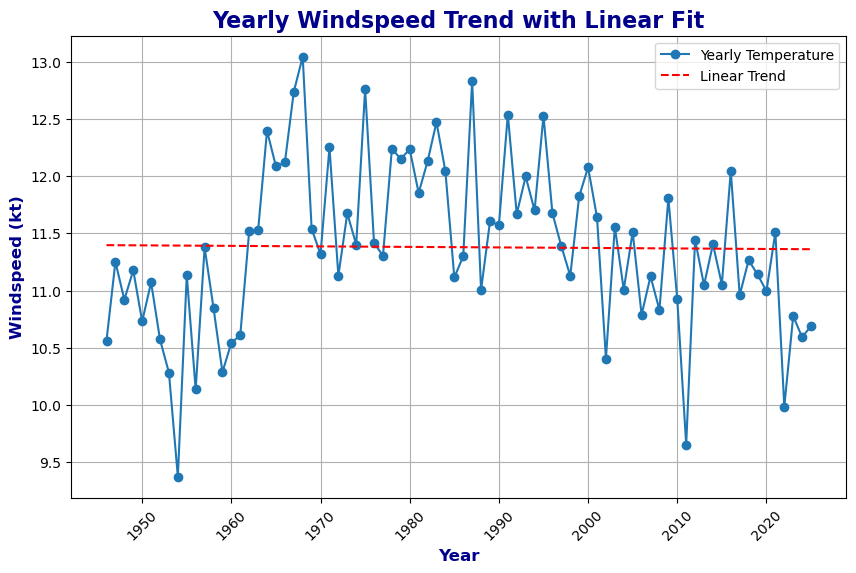

Slope of the trend line: -0.000 °C per year
The windspeed is stable over the years


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Drop the last row using .drop()
combined_df = combined_df.drop(combined_df.index[-1])

# Resample the data by year, calculating the mean temperature for each year
wdsp_yearly = combined_df['wdsp'].resample('YE').mean()

# Linear Trend Analysis:
years = np.arange(len(wdsp_yearly))  # Array of years indices (0, 1, 2, ..., n)
coefficients = np.polyfit(years, wdsp_yearly.values, 1)  # Fit a line to the data
trend_line = np.polyval(coefficients, years)  # Calculate trend values

# Plot the temperature trend with the linear trend line
plt.figure(figsize=(10, 6))
plt.plot(wdsp_yearly.index, wdsp_yearly.values, label='Yearly Temperature', marker='o')
plt.plot(wdsp_yearly.index, trend_line, label='Linear Trend', linestyle='--', color='r')
plt.title('Yearly Windspeed Trend with Linear Fit', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Windspeed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#  Print out the trend line coefficients to see the slope (rate of temperature change)
slope = coefficients[0]
print(f"Slope of the trend line: {slope:.3f} °C per year")
print(f"The windspeed is stable over the years")



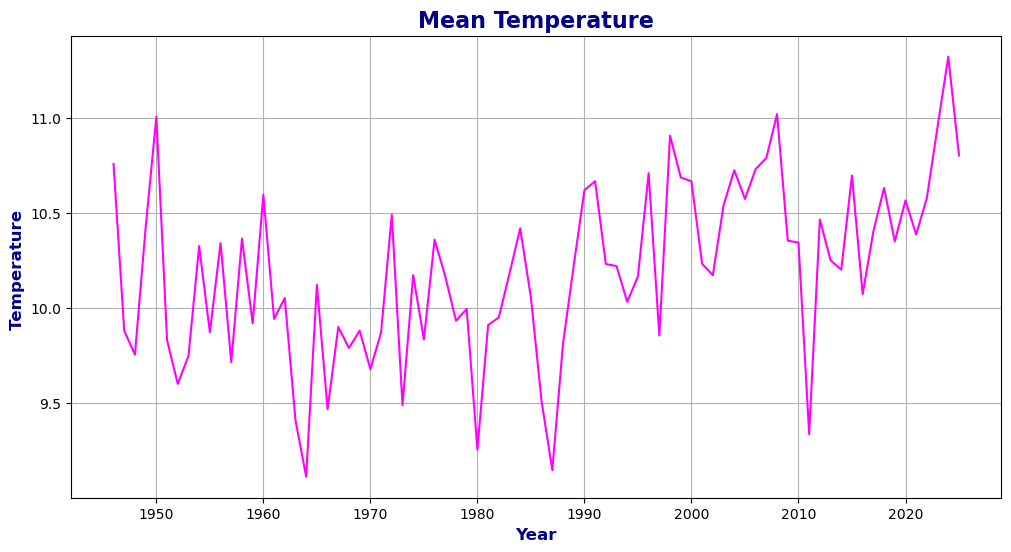

In [18]:
# wdsp data
temp_data = combined_df['temp'] # Extract the wdsp column

# resample data to monthly frequency
temp_monthly = temp_data.resample('ME').mean()


# resample data to yearly frequency
temp_yearly = temp_data.resample('YE').mean()
temp_yearly

# plot yearly data wdsp 
plt.figure(figsize=(12, 6))
plt.plot(temp_yearly, color='magenta')
plt.title('Mean Temperature', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Temperature ', fontsize=12, fontweight='bold', color='darkblue')
plt.grid()

plt.show()


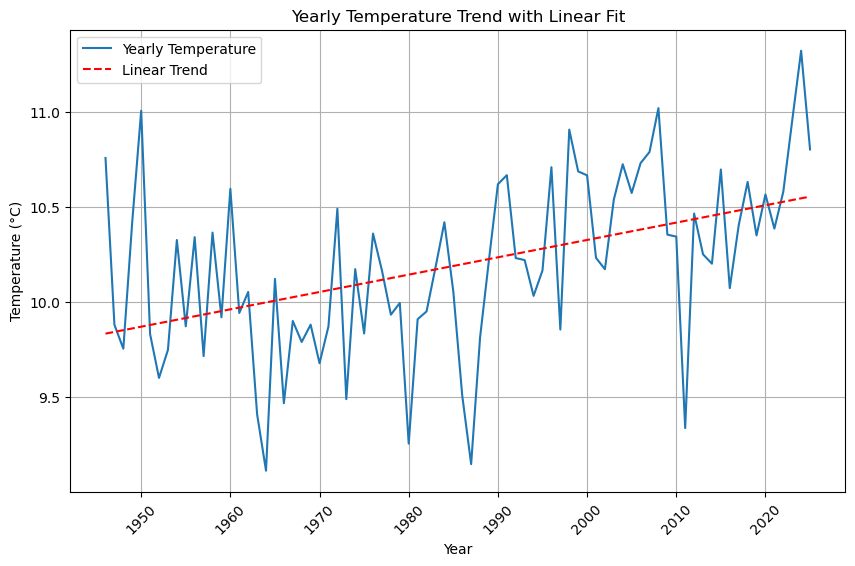

Slope of the trend line: 0.009 °C per year
The temperature is increasing over time.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Drop the last row using .drop()
combined_df = combined_df.drop(combined_df.index[-1])


# Resample the data by year, calculating the mean temperature for each year
temp_yearly = combined_df['temp'].resample('YE').mean()


# Linear Trend (using numpy to fit a line)
years = np.arange(len(temp_yearly))  # Array of years indices (0, 1, 2, ..., n)
coefficients = np.polyfit(years, temp_yearly.values, 1)  # Fit a line to the data
trend_line = np.polyval(coefficients, years)  # Calculate trend values

# Plot the temperature trend with the linear trend line
plt.figure(figsize=(10, 6))
plt.plot(temp_yearly.index, temp_yearly.values, label='Yearly Temperature')
plt.plot(temp_yearly.index, trend_line, label='Linear Trend', linestyle='--', color='r')
plt.title('Yearly Temperature Trend with Linear Fit')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#  Print out the trend line coefficients to see the slope (rate of temperature change)
slope = coefficients[0]
print(f"Slope of the trend line: {slope:.3f} °C per year")

# Interpret the slope
if slope > 0:
    print("The temperature is increasing over time.")
elif slope < 0:
    print("The temperature is decreasing over time.")
else:
    print("The temperature trend is stable over time.")


In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Extract the year from the date index 
combined_df['year'] = combined_df.index.year 

# Extract the years and corresponding temperatures
X = combined_df['year'].values.reshape(-1, 1)  # Years (input feature)
y = combined_df['temp'].values  # Target variable


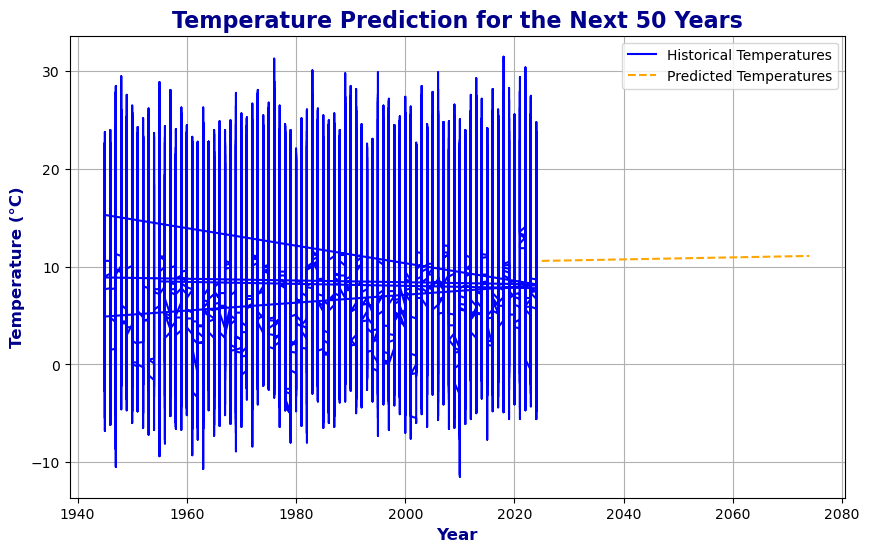

Predicted temperature increase by 2075: 2.90 °C


In [21]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predicting for the next 50 years (2025 to 2075)
future_years = np.arange(2025, 2075).reshape(-1, 1)
future_temps = model.predict(future_years)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['temp'], label='Historical Temperatures', color='blue')
plt.plot(future_years, future_temps, label='Predicted Temperatures', color='orange', linestyle='--')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold', color='darkblue')
plt.title('Temperature Prediction for the Next 50 Years', fontsize=16, fontweight='bold', color='darkblue')
plt.legend()
plt.grid(True)
plt.show()

# Get the last known temperature from the dataset
last_known_temp = combined_df['temp'].iloc[-1]

# Get the predicted temperature for the last year in your forecast (e.g., 2075)
predicted_last_year_temp = future_temps[-1]

# Calculate the predicted temperature increase
temp_increase = predicted_last_year_temp - last_known_temp

print(f'Predicted temperature increase by 2075: {temp_increase:.2f} °C')


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Extract the year from the date index
combined_df['year'] = combined_df.index.year  

# Extract the years and corresponding temperatures
X = combined_df['year'].values.reshape(-1, 1)  
y = combined_df['wdsp'].values  

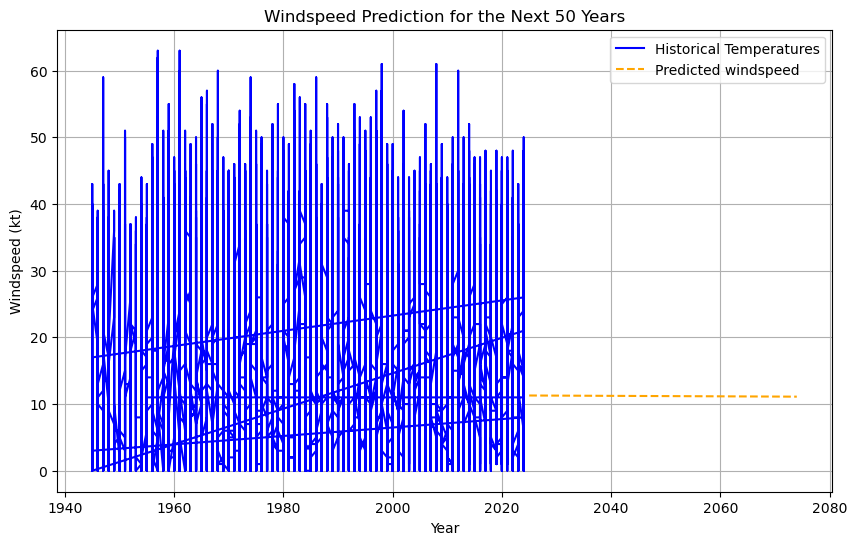

Predicted windspeed increase by 2075: 4.11 kt


In [23]:
# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predicting for the next 50 years (2025 to 2075)
future_years = np.arange(2025, 2075).reshape(-1, 1)
future_temps = model.predict(future_years)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['wdsp'], label='Historical Temperatures', color='blue')
plt.plot(future_years, future_temps, label='Predicted windspeed', color='orange', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Windspeed (kt)')
plt.title('Windspeed Prediction for the Next 50 Years')
plt.legend()
plt.grid(True)
plt.show()

# Get the last known temperature from the dataset
last_known_temp = combined_df['wdsp'].iloc[-1]

# Get the predicted temperature for the last year in your forecast (e.g., 2075)
predicted_last_year_temp = future_temps[-1]

# Calculate the predicted temperature increase
temp_increase = predicted_last_year_temp - last_known_temp

# Print the result
print(f"Predicted windspeed increase by 2075: {temp_increase:.2f} kt")

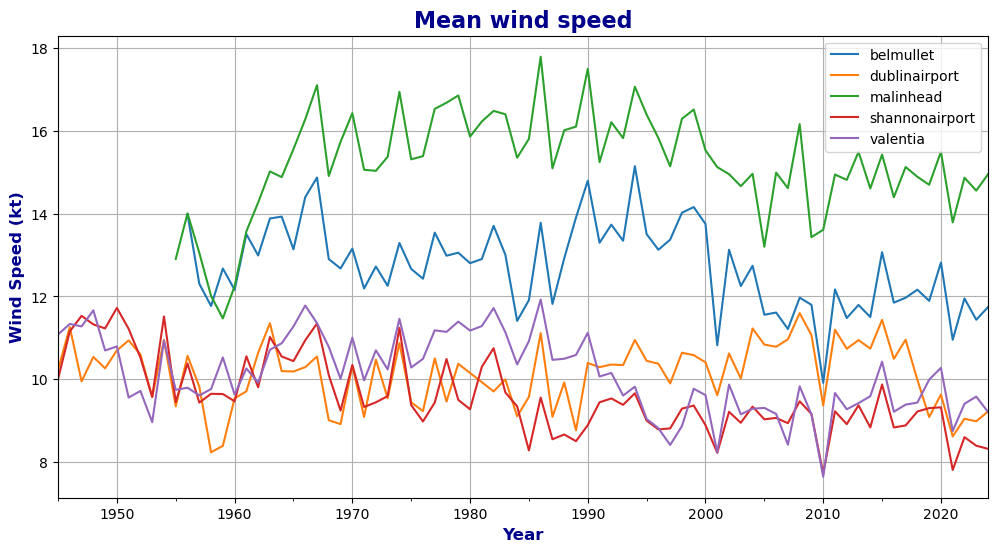

In [24]:
# group data by location. 
grouped = combined_df.groupby('location')

# plot mean data wdsp at all locations
plt.figure(figsize=(12, 6))
for location, data in grouped:
    data['wdsp'].resample('YE').mean().plot(label=location)

plt.title('Mean wind speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('mean_wind_speed.png')
plt.show()

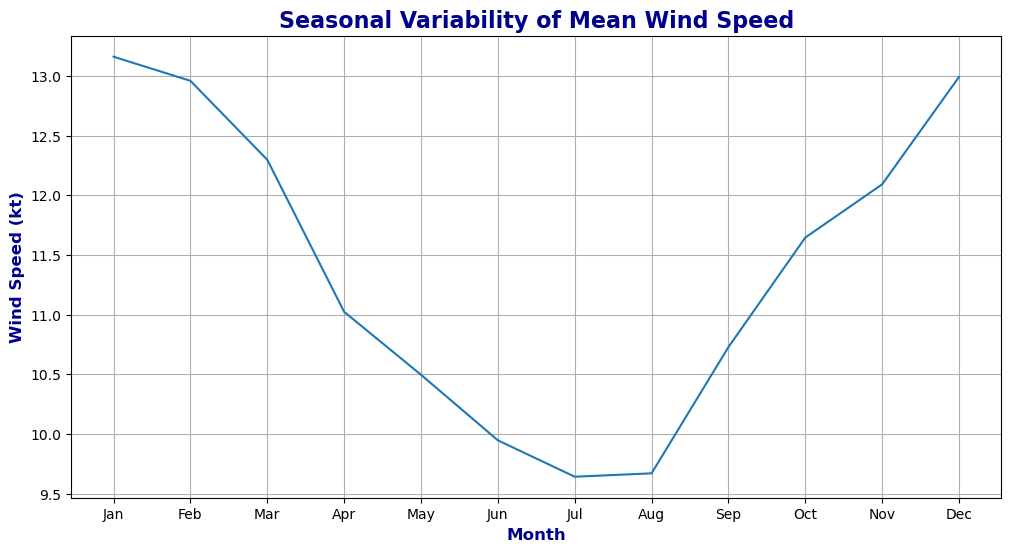

In [25]:
import matplotlib.pyplot as plt

# Resample data to monthly frequency
wdsp_monthly = wdsp_data.resample('ME').mean()

# Plot the monthly mean wind speed
plt.figure(figsize=(12, 6))
wdsp_monthly.groupby(wdsp_monthly.index.month).mean().plot()
plt.title('Seasonal Variability of Mean Wind Speed', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('seasonal_variability_windspeed.png')
plt.show()

In [26]:
# run query to get the data for the year 2004 to 2024
#combined_df = combined_df.query('2004 <= date <= 2024')




In [27]:
# calculate power output of wind turbine using power curve equation. units in kW 
def power_output(wind_speed):
    if wind_speed < 3:
        return 0
    elif wind_speed >= 3 and wind_speed < 12:
        return (0.5 * 1.225 * 3.14 * 47**2 * wind_speed**3) / 1000
    elif wind_speed >= 12 and wind_speed < 25:
        return (0.5 * 1.225 * 3.14 * 47**2 * 12**3) / 1000
    else:
        return 0
    
# Apply the function to the 'wdsp' column to calculate the power output
combined_df['power_output'] = combined_df['wdsp'].apply(power_output)

combined_df

,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clamt,location,year,power_output
date,,,,,,,,,,,,,,,
1956-09-16 15:00:00,0.00,14.40,12.10,10.00,76.00,12.40,1026.70,0.00,0,0.1,16000,5,belmullet,1956,0.00
1956-09-16 16:00:00,0.00,13.90,11.60,9.40,75.00,11.90,1026.60,0.00,0,0.1,24000,4,belmullet,1956,0.00
1956-09-16 17:00:00,0.00,14.20,12.00,10.00,76.00,12.30,1026.40,0.00,0,0.4,19000,5,belmullet,1956,0.00
1956-09-16 18:00:00,0.00,13.00,11.60,10.00,85.00,12.60,1026.50,0.00,0,0.0,30000,4,belmullet,1956,0.00
1956-09-16 19:00:00,0.00,12.60,11.70,11.10,90.00,13.10,1026.80,0.00,0,0.0,28000,7,belmullet,1956,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 18:00:00,1.80,10.00,9.70,9.3,95.00,11.8,1008.3,11.00,220,,,,valentia,2024,5654.70
2024-12-31 19:00:00,1.80,9.70,9.50,9.2,97.00,11.7,1007.7,9.00,220,,,,valentia,2024,3097.13
2024-12-31 20:00:00,1.60,8.90,8.50,8.0,94.00,10.7,1007.4,9.00,250,,,,valentia,2024,3097.13


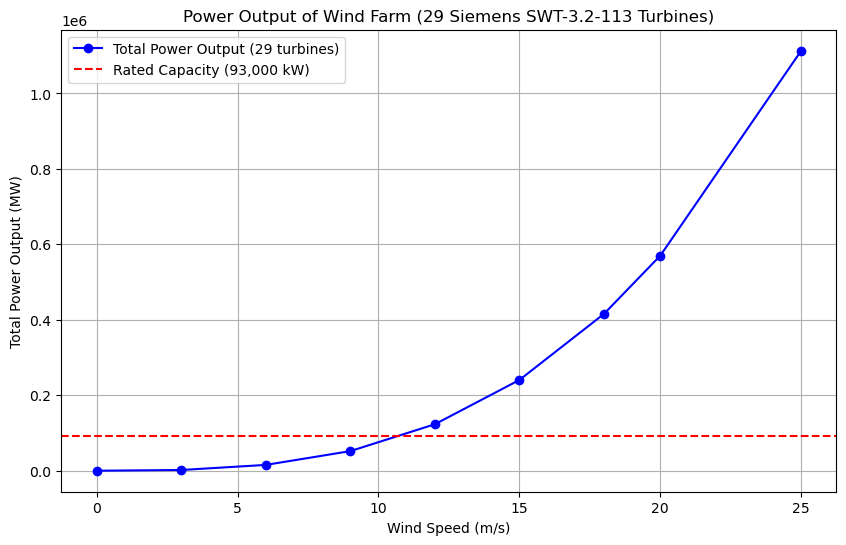

Wind Speed: 0 m/s, Total Power Output: 0.00 MW
Wind Speed: 3 m/s, Total Power Output: 1923.87 MW
Wind Speed: 6 m/s, Total Power Output: 15390.92 MW
Wind Speed: 9 m/s, Total Power Output: 51944.36 MW
Wind Speed: 12 m/s, Total Power Output: 123127.37 MW
Wind Speed: 15 m/s, Total Power Output: 240483.14 MW
Wind Speed: 18 m/s, Total Power Output: 415554.86 MW
Wind Speed: 20 m/s, Total Power Output: 570034.10 MW
Wind Speed: 25 m/s, Total Power Output: 1113347.85 MW


In [49]:
# Oweninny wind farm, Co. Mayo has 29 Siemens SWT-3.2-113 turbines.

import numpy as np
import matplotlib.pyplot as plt

# Constants
number_of_turbines = 29
turbine_capacity = 3.2  # in MW (rated capacity)
rotor_diameter = 113  # in meters
air_density = 1.225  # in kg/m^3
power_coefficient = 0.4  # typical value for modern turbines

# Calculate the swept area (A) of a single turbine (m^2)
swept_area = np.pi * (rotor_diameter / 2) ** 2

# Wind speeds to evaluate (in m/s)
wind_speeds = np.array([0, 3, 6, 9, 12, 15, 18, 20, 25])

# Function to calculate power output for a single turbine
def calculate_turbine_power(wind_speed, swept_area, air_density, power_coefficient):
    # Wind power formula: P = 0.5 * rho * A * v^3 * Cp
    return 0.5 * air_density * swept_area * (wind_speed ** 3) * power_coefficient / 1000  # Power in MW

# Calculate power output for a single turbine at different wind speeds
turbine_power = calculate_turbine_power(wind_speeds, swept_area, air_density, power_coefficient)

# Calculate total power output for the entire wind farm
total_power_output = turbine_power * number_of_turbines

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, total_power_output, label='Total Power Output (29 turbines)', color='b', marker='o')
plt.axhline(y=turbine_capacity * number_of_turbines * 1000, color='r', linestyle='--', label="Rated Capacity (93,000 kW)")



# Adding labels and title
plt.title("Power Output of Wind Farm (29 Siemens SWT-3.2-113 Turbines)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Total Power Output (MW)")
plt.legend()
plt.grid(True)
plt.show()

# Print power output for each wind speed
for ws, power in zip(wind_speeds, total_power_output):
    print(f"Wind Speed: {ws} m/s, Total Power Output: {power:.2f} MW")



In [30]:
import pandas as pd
import numpy as np


# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Extract the month from the index and apply the season function
combined_df['season'] = combined_df.index.month.map(get_season)

# Check the first few rows to see if the 'season' column was added correctly
combined_df['season']



date
1956-09-16 15:00:00    Autumn
1956-09-16 16:00:00    Autumn
1956-09-16 17:00:00    Autumn
1956-09-16 18:00:00    Autumn
1956-09-16 19:00:00    Autumn
                        ...  
2024-12-31 18:00:00    Winter
2024-12-31 19:00:00    Winter
2024-12-31 20:00:00    Winter
2024-12-31 21:00:00    Winter
2024-12-31 22:00:00    Winter
Name: season, Length: 3307160, dtype: object

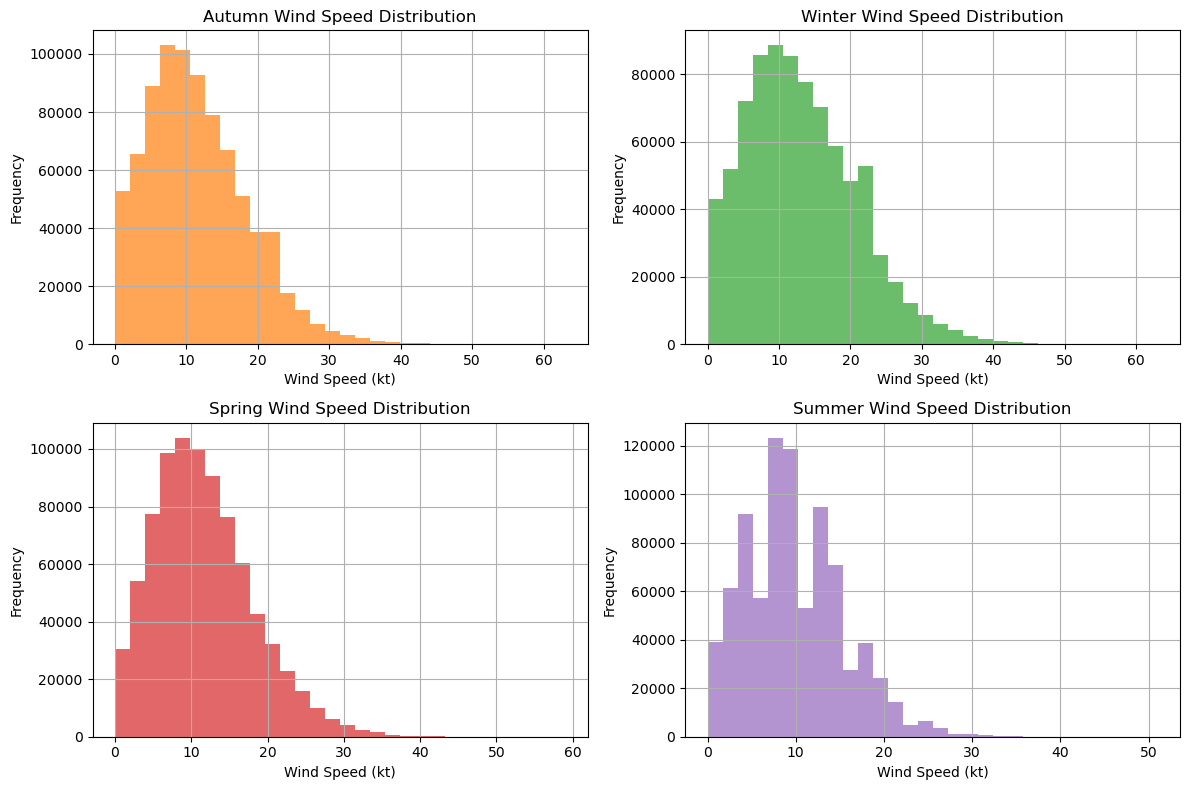

In [31]:
# Plot histograms for each season
plt.figure(figsize=(12, 8))

for i, season in enumerate(combined_df['season'].unique(), 1):
    plt.subplot(2, 2, i)
    combined_df[combined_df['season'] == season]['wdsp'].plot(kind='hist', bins=30, alpha=0.7, color=f'C{i}')
    plt.title(f'{season} Wind Speed Distribution')
    plt.xlabel('Wind Speed (kt)')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [32]:
# Check the skewness of wind speed data (wdsp)
wdsp_skewness = combined_df['wdsp'].skew()
print(f"Skewness of WDSP: {wdsp_skewness}")

# skewness per season and location 
grouped = combined_df.groupby(['season', 'location'])
skewness = grouped['wdsp'].skew()
skewness

Skewness of WDSP: 0.8275530460825923


season  location      
Autumn  belmullet        0.59
        dublinairport    0.64
        malinhead        0.46
        shannonairport   0.93
        valentia         0.60
Spring  belmullet        0.57
        dublinairport    0.62
        malinhead        0.49
        shannonairport   0.83
        valentia         0.51
Summer  belmullet        0.47
        dublinairport    0.52
        malinhead        0.40
        shannonairport   0.63
        valentia         0.37
Winter  belmullet        0.55
        dublinairport    0.59
        malinhead        0.46
        shannonairport   0.92
        valentia         0.50
Name: wdsp, dtype: float64

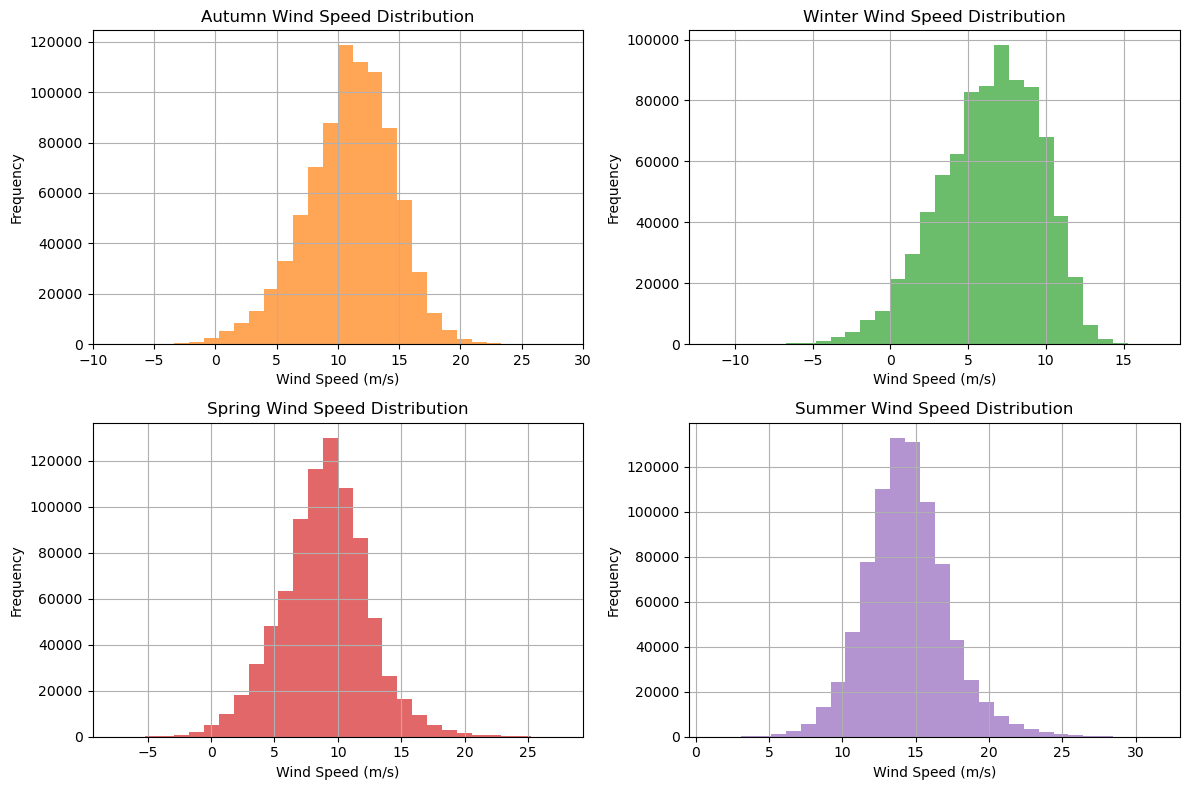

In [33]:
# Plot histograms for each season
plt.figure(figsize=(12, 8))

for i, season in enumerate(combined_df['season'].unique(), 1):
    plt.subplot(2, 2, i)
    combined_df[combined_df['season'] == season]['temp'].plot(kind='hist', bins=30, alpha=0.7, color=f'C{i}')
    plt.title(f'{season} Wind Speed Distribution')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

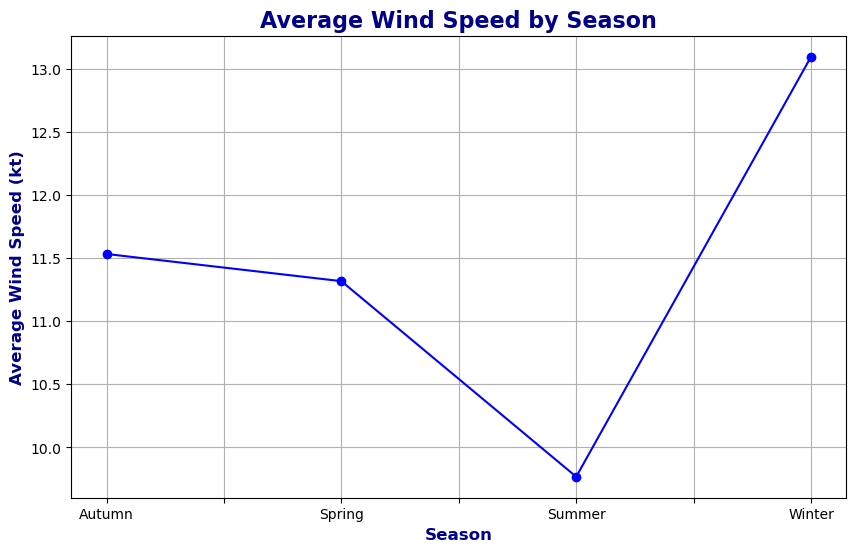

In [34]:
import matplotlib.pyplot as plt

# Plotting average wind speed by season
season_avg = combined_df.groupby('season')['wdsp'].mean()

# Create a line plot of average wind speed by season
plt.figure(figsize=(10, 6))
season_avg.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Wind Speed by Season', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Season', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Average Wind Speed (kt)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True)
plt.show()


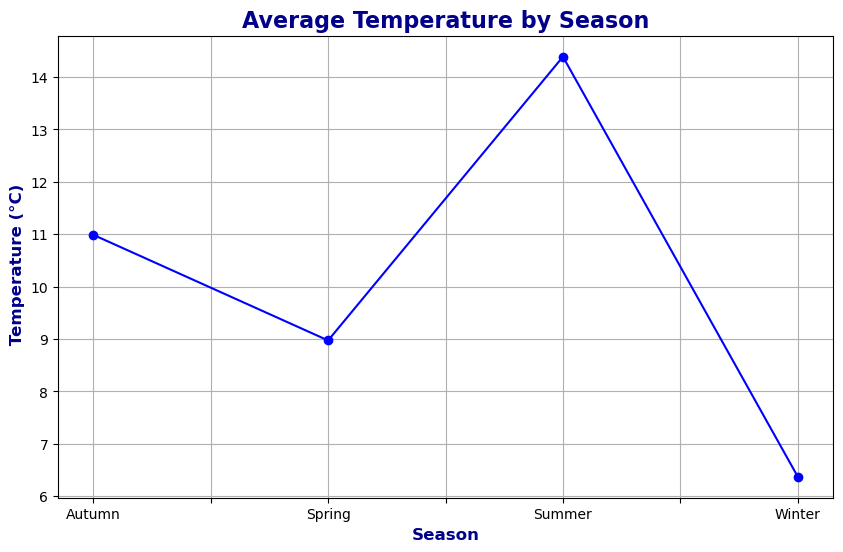

In [35]:
import matplotlib.pyplot as plt

# Plotting average wind speed by season
season_avg = combined_df.groupby('season')['temp'].mean()

# Create a line plot of average wind speed by season
plt.figure(figsize=(10, 6))
season_avg.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Temperature by Season', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Season', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel(' Temperature (°C)', fontsize=12, fontweight='bold', color='darkblue')
plt.grid(True)
plt.show()


In [36]:
import math

def calculate_wind_power(wind_speed, turbine_radius, air_density=1.225, power_coefficient=0.4):
    # Swept area (A) = π * r^2
    swept_area = math.pi * (turbine_radius ** 2)
    
    # Wind power (P) = (1/2) * ρ * A * v^3 * Cp
    power_output = 0.5 * air_density * swept_area * (wind_speed ** 3) * power_coefficient
    
    return power_output  # in watts

# Example usage:
wind_speed = 10  # Wind speed in m/s
turbine_radius = 20  # Radius of the turbine blades in meters

power = calculate_wind_power(wind_speed, turbine_radius)
print(f"Power output: {power/1000:.2f} kW")  # Convert to kilowatts for easier interpretation


Power output: 307.88 kW


In [37]:
# run query to get the data for the year 2019
combined_df = combined_df.query('2019 <= date <= 2019')

# calculate power output of wind turbine using power curve equation
def power_output(wind_speed):
    if wind_speed < 3:
        return 0
    elif wind_speed >= 3 and wind_speed < 12:
        return (0.5 * 1.225 * 3.14 * 47**2 * wind_speed**3) / 1000
    elif wind_speed >= 12 and wind_speed < 25:
        return (0.5 * 1.225 * 3.14 * 47**2 * 12**3) / 1000
    else:
        return 0
    

# Apply the function to the 'wdsp' column to calculate the power output
combined_df['power_output'] = combined_df['wdsp'].apply(power_output)

# Display the first few rows of the DataFrame to check the new column
combined_df

C:\Users\louis\AppData\Local\Temp\ipykernel_20260\3717746699.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['power_output'] = combined_df['wdsp'].apply(power_output)


,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clamt,location,year,power_output,season
date,,,,,,,,,,,,,,,,
2019-01-01,0.00,10.50,9.60,8.70,89.00,11.30,1034.90,9.00,240,,,,belmullet,2019,3097.13,Winter
2019-01-01,0.00,8.80,7.30,5.40,80.00,9.0,1034.70,9.00,250,0.00,30000,3,dublinairport,2019,3097.13,Winter
2019-01-01,0.00,10.20,10.00,9.8,97.00,12.1,1031.70,17.00,260,,,,malinhead,2019,7341.34,Winter
2019-01-01,0.00,9.40,8.00,6.30,81.00,9.60,1036.90,3.00,230,0.00,20000,7,shannonairport,2019,114.71,Winter
2019-01-01,0.00,9.80,8.20,6.4,79.00,9.6,1036.7,3.00,190,,,,valentia,2019,114.71,Winter


In [38]:
# get 2019 data
combined_df_2019 = combined_df.query('2019 <= date <= 2019')

# calculate power output of wind turbine using power curve equation

def power_output(wind_speed):
    if wind_speed < 3:
        return 0
    elif wind_speed >= 3 and wind_speed < 12:
        return (0.5 * 1.225 * 3.14 * 47**2 * wind_speed**3) / 1000
    elif wind_speed >= 12 and wind_speed < 25:
        return (0.5 * 1.225 * 3.14 * 47**2 * 12**3) / 1000
    else:
        return 0
    
# Apply the function to the 'wdsp' column to calculate the power output
combined_df_2019['power_output'] = combined_df_2019['wdsp'].apply(power_output)

# Display the first few rows of the DataFrame to check the new column
combined_df_2019


,rain,temp,wetb,dewpt,rhum,vappr,msl,wdsp,wddir,sun,vis,clamt,location,year,power_output,season
date,,,,,,,,,,,,,,,,
2019-01-01,0.00,10.50,9.60,8.70,89.00,11.30,1034.90,9.00,240,,,,belmullet,2019,3097.13,Winter
2019-01-01,0.00,8.80,7.30,5.40,80.00,9.0,1034.70,9.00,250,0.00,30000,3,dublinairport,2019,3097.13,Winter
2019-01-01,0.00,10.20,10.00,9.8,97.00,12.1,1031.70,17.00,260,,,,malinhead,2019,7341.34,Winter
2019-01-01,0.00,9.40,8.00,6.30,81.00,9.60,1036.90,3.00,230,0.00,20000,7,shannonairport,2019,114.71,Winter
2019-01-01,0.00,9.80,8.20,6.4,79.00,9.6,1036.7,3.00,190,,,,valentia,2019,114.71,Winter
